In [13]:
# Import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
#pd.set_option('display.max_columns', None)  
#pd.set_option('display.max_rows', None)

In [3]:
two_sides_full=pd.read_csv('data/TWOSIDES.csv.xz.csv', compression='xz', \
                          header=0, sep=',', quotechar='"')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,4,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
two_sides=two_sides_full.drop(['A', 'B', 'C', 'D', 'PRR', 'PRR_error', \
                              'mean_reporting_frequency', 'drug_1_rxnorn_id', \
                              'drug_2_rxnorm_id', 'condition_meddra_id'], axis=1)

In [5]:
two_sides.columns=['drug_1', 'drug_2', 'condn_name']

In [6]:
two_sides=two_sides.drop_duplicates(subset=['drug_1', 'drug_2', 'condn_name'])

In [20]:
two_sides.condn_name.nunique()

12726

In [ ]:
two_sides.to_csv(index=False)

In [7]:
two_sides_r=two_sides.query('condn_name=="Nausea" | condn_name =="Dyspnoea" | \
condn_name =="Diarrhoea" | condn_name =="Vomiting" | condn_name =="Pyrexia" | \
condn_name =="Pneumonia"')

In [34]:
aspirin.head(10)

,drug_1,drug_2,condn_name
58040,Aspirin,nabumetone,Anaemia
58041,Aspirin,nabumetone,Aplasia pure red cell
58042,Aspirin,nabumetone,Aplastic anaemia
58043,Aspirin,nabumetone,Pancytopenia
58044,Aspirin,nabumetone,Ecchymosis
58045,Aspirin,nabumetone,Petechiae
58046,Aspirin,nabumetone,Disseminated intravascular coagulation
58047,Aspirin,nabumetone,Purpura
58048,Aspirin,nabumetone,Sickle cell anaemia
58049,Aspirin,nabumetone,Non-Hodgkin's lymphoma


In [8]:
common_sideeffects=two_sides.groupby('condn_name').condn_name.count()\
.sort_values(ascending=False)

In [9]:
common_sideeffects=common_sideeffects.to_frame()
common_sideeffects=common_sideeffects.rename(columns={'condn_name': 'count'}).reset_index()

In [10]:
common_sideeffects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12726 entries, 0 to 12725
Data columns (total 2 columns):
condn_name    12726 non-null object
count         12726 non-null int64
dtypes: int64(1), object(1)
memory usage: 199.0+ KB


In [11]:
common_sideeffects.head(10)

,condn_name,count
0,Nausea,164161
1,Dyspnoea,159052
2,Diarrhoea,156584
3,Vomiting,153055
4,Pyrexia,148162
5,Pneumonia,145767
6,Fatigue,145584
7,Pain,145118
8,Anaemia,143740
9,Headache,138530


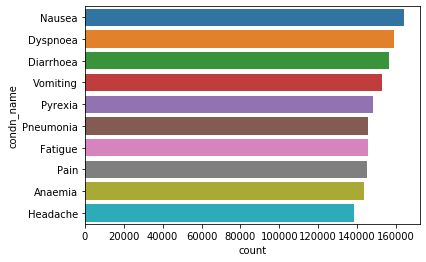

In [31]:
sns.barplot(x="count", y="condn_name", data=common_sideeffects[0:10]);

In [22]:
drug_se=two_sides.groupby(['drug_1', 'drug_2']).condn_name.count().sort_values(ascending=False).reset_index()

In [24]:
drug_10=drug_se.head(10)

In [26]:
drug_10['drug_pair'] = drug_10['drug_1'].str.cat(drug_10['drug_2'],sep="-")
drug_10

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,drug_1,drug_2,condn_name,drug_pair
0,Aspirin,Simvastatin,5700,Aspirin-Simvastatin
1,Aspirin,Metoprolol,5625,Aspirin-Metoprolol
2,Aspirin,Furosemide,5590,Aspirin-Furosemide
3,Aspirin,atorvastatin,5579,Aspirin-atorvastatin
4,Aspirin,Omeprazole,5125,Aspirin-Omeprazole
5,Folic Acid,Methotrexate,5120,Folic Acid-Methotrexate
6,Amlodipine,Aspirin,5117,Amlodipine-Aspirin
7,Aspirin,Acetaminophen,5062,Aspirin-Acetaminophen
8,Aspirin,clopidogrel,5035,Aspirin-clopidogrel
9,Aspirin,Lisinopril,5016,Aspirin-Lisinopril


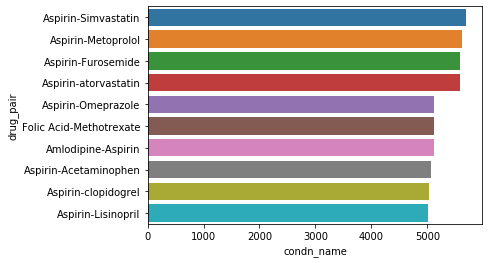

In [29]:
sns.barplot(x="condn_name", y="drug_pair", data=drug_10);

In [36]:
aspirin=two_sides.query('(drug_1=="Aspirin") & (drug_2=="Simvastatin")')

In [38]:
aspirin.head(15)

,drug_1,drug_2,condn_name
8183983,Aspirin,Simvastatin,Anaemia vitamin B12 deficiency
8183984,Aspirin,Simvastatin,Iron deficiency anaemia
8183985,Aspirin,Simvastatin,Pernicious anaemia
8183986,Aspirin,Simvastatin,Anaemia
8183987,Aspirin,Simvastatin,Anaemia macrocytic
8183988,Aspirin,Simvastatin,Anaemia megaloblastic
8183989,Aspirin,Simvastatin,Anaemia postoperative
8183990,Aspirin,Simvastatin,Haemorrhagic anaemia
8183991,Aspirin,Simvastatin,Hypochromic anaemia
8183992,Aspirin,Simvastatin,Malaria
